# 基于Keras的Mnist手写体识别原理讲解

## 1. 认识Mnist数据集


MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST).  
训练集由来自 250 个不同人手写的数字构成, 其中 50% 是高中学生, 50% 来自人口普查局的工作人员.   
测试集也是同样比例的手写数字数据.

In [15]:
import numpy as np
def load_data(path='./datasets/mnist.npz'):
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)
(X_train, Y_train), (X_test, Y_test) = load_data('./datasets/mnist.npz') 

60000


#### 现在我们通过读取该数据集中的数据，并可视化可以直观的看到数据在数据集中的分布情况  
* 训练集 X:60000*28*28  Y:60000
* 测试集 X:10000*28*28  Y:10000

In [21]:
print("X_train:",X_train.shape,"Y_train:",Y_train.shape)
print("X_test:",X_test.shape,"Y_test:",Y_test.shape)

X_train: (60000, 28, 28) Y_train: (60000,)
X_test: (10000, 28, 28) Y_test: (10000,)


#### 每一张图片分辨率为28*28，单通道灰度图，标签形式为0-9

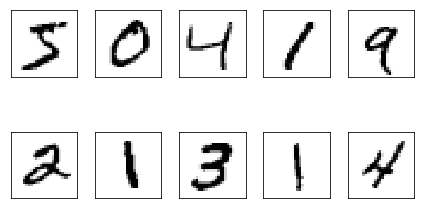

[5 0 4 1 9 2 1 3 1 4]


In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten()
for i in range(10):
    img = X_train[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()
print(Y_train[0:10])

# 2.对图像提取特征的方法

## 2.1 图片的数据特征

对于一张灰度图片，实际上可以用一个二维矩阵来表示  
所谓的灰度图，实际就是我们平常口头说的“黑白照片”，这种照片每一个像素点只有一个值来表示该点的颜色深度，通常使用8bit来表示单个像素点的值，所以每个像素点的取值范围为$2^8$，即[0,255]，因为单通道的缘故，它无法表示红蓝绿等其他颜色，仅能表示白黑灰，所以被称为“灰度图”。  
需要注意的是，在灰度图中，0代表黑色，255代表白色。  
例如：  
     [[0,0,255,0,0],  
     [0,0,255,0,0],  
     [0,0,255,0,0],  
     [0,0,255,0,0],  
     [0,0,255,0,0]]  

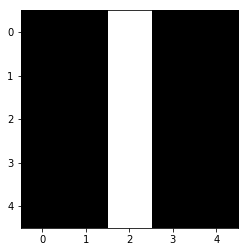

In [29]:
from PIL import Image
image = np.array([[0,0,255,0,0],
     [0,0,255,0,0],
     [0,0,255,0,0],
     [0,0,255,0,0],
     [0,0,255,0,0]])
new_im = Image.fromarray(image.astype(np.uint8))
plt.imshow(new_im)
plt.show()

## 2.2 使用全连接提取特征

在图像技术发展的初期，人们试图利用传统的DNN网络来解决图像的分类问题，直接将图片矩阵拉为一维矩阵作为模型的输入，如上图中的5*5的矩阵就可以拉长为一个维度为25的向量。

定义一个输入层和定义一个隐藏层区别不大，只是在输入层中的输入数据的维度需要被修改为输入向量的维度大小。  
mnist数据集的图片分辨率为28*28，所以输入向量的维度大小就为 $28*28=784$。  
利用keras可以快速构建模型网络，使用model.add()可以增加一层模型，Dense为全连接层，500为神经元数量也是输出的维度，input_shape为输入维度

In [ ]:
model.add(Dense(500,input_shape=(784,))) # 输入层，28*28=784 输入层将二维矩阵换成了一维向量输入
model.add(Activation('tanh')) # 激活函数是tanh 为双曲正切  tanh(x) = sinh(x)/cosh(x) = (e^x - e^(-x))/(e^x + e^(-x))

那么对于Mnist数据集，我们可以定义一个DNN网络试试：  
可以看到我们的模型有一个输入层，一个输出层，两个隐藏层。  
其中输出层的激活函数为$softmax$函数，这个函数是分类任务中最为重要的激活函数，通常被布置在输出层上，可以输出该层神经元节点数的概率分布，所以通常使用该函数的输出层，其神经元数量等于当前分类任务中的类别数量。  
在第三行代码中，使用了Dropout，该函数会随机舍弃部分数据，仅将剩下的数据向下传递，该函数的目的是为了防止“过拟合”现象的发生，对该现象感兴趣的同学，可以自行查找资料，这里不做赘述。

In [ ]:
model.add(Dense(500,input_shape=(784,))) # 输入层，28*28=784 输入层将二维矩阵换成了一维向量输入
model.add(Activation('tanh')) # 激活函数是tanh 为双曲正切  tanh(x) = sinh(x)/cosh(x) = (e^x - e^(-x))/(e^x + e^(-x))
model.add(Dropout(0.5)) # 采用50%的dropout  随机取一半进行训练
 
    
#Dense Layer   隐藏层
model.add(Dense(500)) # 隐藏层节点500个
model.add(Activation('tanh'))
model.add(Dropout(0.5))
 
#Dense Layer   隐藏层
model.add(Dense(500))
model.add(Activation('tanh'))

 
#output layer  输出层
model.add(Dense(10)) # 输出结果是10个类别，所以维度是10
model.add(Activation('softmax')) # 最后一层用softmax作为激活函数
model_name = 'DNN'

前面我们也提到过，该模型的输入是一个728维的向量，所以我们需要对输入的训练数据和测试数据做预处理：  
``` py
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
```
在这一步中，将X_train的后两维做乘法，从$60000*28*28$变成$60000*784$，X_test同理。
对于真实标签Y，我们需要将其转换为one-hot码作为输入：
```py
Y_train = (np.arange(10) == Y_train[:, None]).astype(int)
Y_test = (np.arange(10) == Y_test[:, None]).astype(int)
```
这一步里，假设某一个标签为2，转成one-hot码就是：[0,0,1,0,0,0,0,0,0,0]  
假设某一个标签为5，转成one-hot码就是：[0,0,0,0,0,5,0,0,0,0]  
这样标签部分从一个一维矩阵变成了二维矩阵：[2,5]===>[[0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,5,0,0,0,0]]

## 2.3 使用卷积提取特征

对于图片而言，拉长为一维矩阵直接使用全连接做特征提取并分类的效果并不理想，经过尝试，人们发现使用卷积核对图像进行卷积，能够提取到很多肉眼分辨不出来的特征，于是将卷积引入神经网络中，发现果然效果好了一大截！

### 2.3.1 什么是卷积
卷积是一种看似高深，但原理十分简单的运算，在传统图像处理中，边缘提取、模糊处理等常规操作，都是利用不同的算子对图像进行卷积得到的。
![avatar](img/conv1.jpg) 
可以看到，所谓卷积，实际上就是将一个方形的矩阵在另一个矩阵上滑动并进行运算，得到的值投射为另一个矩阵。  
我们将小的，用于滑动的方形矩阵称为：卷积核  
整个滑动操作就是：卷积  
投射得到的矩阵就是：feature map，即特征图。  
卷积核每次滑动的计算也非常简单，就是将对应的值相乘，再把所有值相加，例如下图中：  
![avatar](img/conv.jpg)
第一步的操作就为：$3*0+3*1+2*2+2*0+2*0+0*1+0*3+1*1+2*2=12$  
经过一轮卷积后，矩阵的维度就从$5*5$变成了$3*3$

### 2.3.2 什么是padding
如果你仔细观察上面关于卷积的动图，你就会发现，对于处于原矩阵边缘的像素，永远不会处于卷积核的中心，因为内核没有东西可以扩展到边缘之外，而且经过一轮卷积后矩阵的维度就会下降，这并不理想，因为我们经常希望输入的尺寸与输出尺寸相同。  
所谓padding，就是在原矩阵周围填充一圈0，让原本矩阵的边缘数据能够处于卷积核的中心。同时，使用padding后，利用卷积核得到的特张矩阵维度大小和原举证维度大小相同。
![avatar](img/pad.gif)

### 2.3.3 什么是Max_pooling
特征图越大，需要计算的参数就越多，为了提高效率，让模型能够集中注意力在特定的特征上，使用Max_pooling方法，对特征矩阵进行缩放操作。逻辑与卷积相似，使用方形算子遍历图片的矩阵，每次取算子遍历区域中的最大值作为算子的输出，能使特征图的长宽减半，但特征图包含的特征信息并不会缺损太多。
![avatar](img/pool.png)

### 2.3.4 使用keras搭建LeNet网络
使用keras搭建网络模型十分的快捷方便。

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1), kernel_size=(5, 5), filters=20, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Conv2D(kernel_size=(5, 5), filters=50,  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model_name = "LeNet"

搭建模型本身并没有特别的地方，但需要注意的是，卷积层作为输入层，那么我们输入的就不再是一个一维矩阵，而是一张完整的图片，即一个二维或三维矩阵，所以对于Mnist数据集而言，需要将输入数据reshape到[-1,28,28,1]，此处的-1代表任意数量的图片，28*28代表图片分辨率，1为图片通道数量。

# 3. 优化器与模型编译

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # 设定优化器的对应参数
tBatchSize = 128        # 选择每次传入模型的图片数量

SGD：为随机梯度下降优化器  
lr：学习率  
decay：每次更新参数后，学习率的衰减值  
momentum：动量，一般小于0  
nesterov：是否使用牛顿动量。  
不懂的同学，请看深度学习入门系列中的优化器课程！

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[metrics.categorical_accuracy]) # 使用交叉熵作为loss函数  

使用预设的loss函数，优化器，acc函数编译模型。

# 4. 模型的训练

In [ ]:
model.fit(X_train, Y_train, batch_size=tBatchSize, epochs=5, shuffle=True, validation_split=0.3)   #模型的训练
model.save('./models/my_model.h5')  #保存模型

batch_size：每步送入模型的数据量，同常为$2^n$,如：128.  
epochs:模型的迭代次数，假设训练集为1000，batch_size为100，那么就需要经过十步训练，才能算一个epoch。  
shuffle:是否在每次选择数据时，打乱数据。
validation_split:从训练集中提取多少作为验证集